In [2]:
import numpy as np
from matplotlib import pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import ROOT
from ROOT import TH1F, TCanvas

Using TensorFlow backend.


Welcome to JupyROOT 6.11/03


## Info
20>high 20<low

In [2]:
files=["pi-30GeV.txt"]
#"pi-300GeV.txt",
#"pi-200GeV.txt",
#"pi-150GeV.txt",
#"pi-100GeV.txt"
#"pi-50GeV.txt",
#"pi-30GeV.txt",
#"pi-20GeV.txt",
#"pi-9GeV.txt",
#"pi-8GeV.txt",
#"pi-7GeV.txt",
#"pi-6GeV.txt",
#"pi-5GeV.txt",
#"pi-4GeV.txt",
#"pi-3GeV.txt",
#"pi-2GeV.txt"]


In [3]:
prefix="pi-txt/"
lines9x9={}
lines9x9buffer=[]
lines3x4={}
lines3x4buffer=[]

#### Getting lines of length 9 and 4
the result is a map with the file

In [4]:
for i in files:
    file = open(prefix+i)
    data=file.readlines()
    for l in data:
        line=np.fromstring(l.strip(),sep=" ")
        if len(line) == 9 :
            lines9x9buffer.append(line)
        if len(line) == 4 :
            lines3x4buffer.append(line)
    lines9x9[i]=lines9x9buffer
    lines3x4[i]=lines3x4buffer

In [5]:
def shapeimages9x9(lines):
    img9x9={}
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%9==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img9x9[key]=imgs 
    return img9x9

def shapeimages3x4(lines):
    img3x4={}
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%3==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img3x4[key]=imgs 
    return img3x4


In [6]:
img9x9 = shapeimages9x9(lines9x9)
img100GeVChannel1 = img9x9['pi-30GeV.txt']
print(np.array(img9x9['pi-30GeV.txt']).shape)
img3x4 = shapeimages3x4(lines3x4)
print(np.array(img3x4['pi-30GeV.txt']).shape)


(7374, 81)
(7374, 12)


#### Plotting img

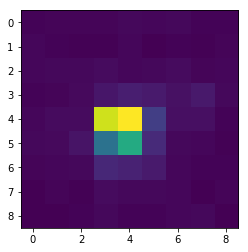

In [7]:
plt.imshow(np.array(img9x9['pi-100GeV.txt'][0]).reshape((9,9)))
plt.show()

In [8]:
#image A must be 3x4 flattened
def ImgMask3x3To9x9(A):
    B=np.zeros(81)
    #row 1
    B[0]=A[0]/6.0
    B[1]=A[0]/6.0
    B[2]=A[1]/9.0
    B[3]=A[1]/9.0
    B[4]=A[1]/9.0
    B[5]=A[2]/9.0
    B[6]=A[2]/9.0
    B[7]=A[2]/9.0
    B[8]=A[3]/3.0
    
    #row 2
    B[9] =A[0]/6.0
    B[10]=A[0]/6.0
    B[11]=A[1]/9.0
    B[12]=A[1]/9.0
    B[13]=A[1]/9.0
    B[14]=A[2]/9.0
    B[15]=A[2]/9.0
    B[16]=A[2]/9.0
    B[17]=A[3]/3.0

    #row 3
    B[18]=A[0]/6.0
    B[19]=A[0]/6.0
    B[20]=A[1]/9.0
    B[21]=A[1]/9.0
    B[22]=A[1]/9.0
    B[23]=A[2]/9.0
    B[24]=A[2]/9.0
    B[25]=A[2]/9.0
    B[26]=A[3]/3.0

    #row 4
    B[27]=A[4]/6.0
    B[28]=A[4]/6.0
    B[29]=A[5]/9.0
    B[30]=A[5]/9.0
    B[31]=A[5]/9.0
    B[32]=A[6]/9.0
    B[33]=A[6]/9.0
    B[34]=A[6]/9.0
    B[35]=A[7]/3.0

    #row 5
    B[36]=A[4]/6.0
    B[37]=A[4]/6.0
    B[38]=A[5]/9.0
    B[39]=A[5]/9.0
    B[40]=A[5]/9.0
    B[41]=A[6]/9.0
    B[42]=A[6]/9.0
    B[43]=A[6]/9.0
    B[44]=A[7]/3.0
    
    #row 6
    B[45]=A[4]/6.0
    B[46]=A[4]/6.0
    B[47]=A[5]/9.0
    B[48]=A[5]/9.0
    B[49]=A[5]/9.0
    B[50]=A[6]/9.0
    B[51]=A[6]/9.0
    B[52]=A[6]/9.0
    B[53]=A[7]/3.0

    #row 7
    B[54]=A[8]/6.0
    B[55]=A[8]/6.0
    B[56]=A[9]/9.0
    B[57]=A[9]/9.0
    B[58]=A[9]/9.0
    B[59]=A[10]/9.0
    B[60]=A[10]/9.0
    B[61]=A[10]/9.0
    B[62]=A[11]/3.0
    
    #row 8
    B[63]=A[8]/6.0
    B[64]=A[8]/6.0
    B[65]=A[9]/9.0
    B[66]=A[9]/9.0
    B[67]=A[9]/9.0
    B[68]=A[10]/9.0
    B[69]=A[10]/9.0
    B[70]=A[10]/9.0
    B[71]=A[11]/3.0

    #row 9
    B[72]=A[8]/6.0
    B[73]=A[8]/6.0
    B[74]=A[9]/9.0
    B[75]=A[9]/9.0
    B[76]=A[9]/9.0
    B[77]=A[10]/9.0
    B[78]=A[10]/9.0
    B[79]=A[10]/9.0
    B[80]=A[11]/3.0
    return B


In [9]:
img100GeVChannel2=[]
for img in img3x4['pi-100GeV.txt']:
    img9x9=ImgMask3x3To9x9(img)
    img100GeVChannel2.append(img9x9)


## Creating 2 channels images

In [10]:
print(np.array(img100GeVChannel1).shape)
print(np.array(img100GeVChannel2).shape)
img100GeV = np.dstack((img100GeVChannel2,img100GeVChannel1))
print(img100GeV.shape)

(14554, 81)
(14554, 81)
(14554, 81, 2)


In [13]:
X=[]
for index in range(len(img100GeVChannel1)):
    X.append(np.concatenate((img100GeVChannel2[index],img100GeVChannel1[index])))
X=np.array(X)
X_train=X[0:10000,:]
Y_train=np.full(X_train.shape[0],100)
X_test = X[10000:,:]

In [14]:
print(np.array(X).shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)



(14554, 162)
(10000, 162)
(10000,)
(4554, 162)


## Creating a Keras Model

In [3]:
# create model
model = Sequential()
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.save('model_cnn.h5')
model.summary()
# Compile model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               41728     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


2017-11-23 10:27:00.250651: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-23 10:27:00.250699: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-23 10:27:00.250703: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-11-23 10:27:00.250706: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-23 10:27:00.250709: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

In [16]:
model.fit(X_train, Y_train, nb_epoch=100, verbose=1)

Epoch 1/100
   32/10000 [..............................] - ETA: 8s - loss: 10014.1055

/usr/local/lib/python2.7/dist-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


10000/10000 [==============================] - 0s - loss: 1235.8478     
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 244.5468     
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 228.7788     
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 208.2390     
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 178.2293     
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 136.9318     
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 92.8892     
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 54.3567     
Epoch 9/100
10000/10000 [==============================] - 0s - loss: 26.5939     
Epoch 10/100
10000/10000 [==============================] - 0s - loss: 10.8672     
Epoch 11/100
10000/10000 [==============================] - 0s - loss: 4.9974     
Epoch 12/100
10000/10000 [==============================] - 0s - loss: 2.5959     
Epoch 13

2017-11-21 14:08:43.410356: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-21 14:08:43.410375: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-21 14:08:43.410379: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-11-21 14:08:43.410382: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-11-21 14:08:43.410385: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

In [17]:
pred=model.predict(X_test)

In [18]:
pred

array([[ 100.34838867],
       [ 100.16846466],
       [ 100.0861969 ],
       ..., 
       [ 100.41907501],
       [ 100.18737793],
       [ 100.58363342]], dtype=float32)

In [23]:
hist=TH1F("h1","pions",100,90,110)
for i in pred:
    hist.Fill(i)


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


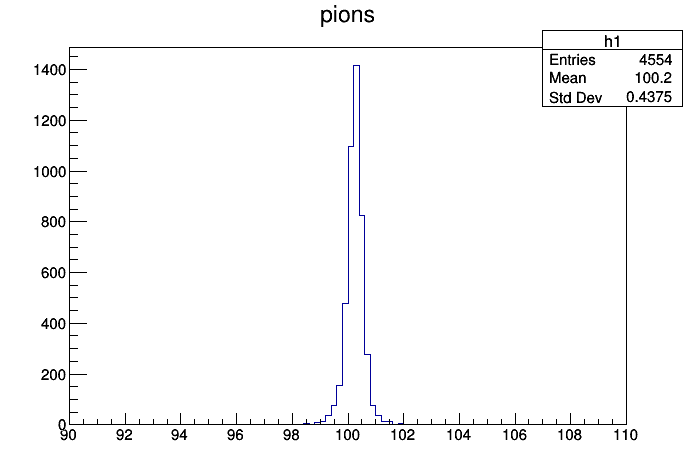

In [24]:
c=TCanvas()
hist.Draw()
c.Draw()